In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.sql import text

import baikalfunctions as bfunc
import scheme_mar2023 as scheme
import mytools
import mysecure

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [3]:
# pd.set_option('display.min_rows', 100)
%matplotlib inline
plt.style.use('dark_background')   # try another styles: 'classic'
plt.rcParams['figure.figsize'] = [15, 5]
#plt.subplots_adjust(top=1, left=0, right=1, bottom=0)

In [4]:
pwd = 'G:\\1_Data1\\91_BaikalJul2022\\'
saveImgPath = 'G:\\1_Data1\\91_BaikalJul2022\\'
saveDataPath = 'G:\\1_Data1\\91_BaikalJul2022\\'

In [6]:
df = pd.read_csv(pwd+'origin.dat', sep='\t', parse_dates=['DateTime'], dayfirst=True, na_values='--', decimal=',')
df

,DateTime,PICARROCO2,PICARROCH4,temperature_air,pressure_air,precipitation,solar_eye,solar_uv,co2_picarro_max,co2_picarro_min,ch4_picarro_max,ch4_picarro_min,h2o_picarro,AIRFLOW,flag,fluo_nx_red,fluo_nx_green,fluo_nx_blue,fluo_kfa_red,fluo_kfa_green,fluo_kfa_blue,comment,water_flow_1,water_flow_2,water_flow_3,water_flow_4,temperature_ds_1,temperature_ds_2,temperature_ds_3,temperature_ds_4,temperature_ds_5,temperature_ds_6,temperature_ds_7,solar_altitude,solar_azimuth,channel
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-07-04 17:18:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.141,16.147,15.879,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,2022-07-04 17:18:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.134,16.147,15.885,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,2022-07-04 17:19:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.141,16.141,15.865,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42912,2022-07-14 18:24:19,NaN,NaN,18.42,96084.2,3.11,5875.0,21.00,NaN,NaN,NaN,NaN,NaN,0.46,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.952,16.702,19.244,NaN,NaN,NaN,NaN,22.92975,275.80191,6.0
42913,2022-07-14 18:24:39,NaN,NaN,18.44,96083.8,3.14,5875.0,21.02,NaN,NaN,NaN,NaN,NaN,0.46,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.970,16.726,19.244,NaN,NaN,NaN,NaN,22.87839,275.86547,6.0
42914,2022-07-14 18:24:59,NaN,NaN,18.59,96087.7,3.17,5875.0,21.00,NaN,NaN,NaN,NaN,NaN,0.46,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.982,16.714,19.232,NaN,NaN,NaN,NaN,22.82700,275.92905,6.0
42915,2022-07-14 18:25:19,NaN,NaN,18.54,96090.5,3.19,5572.0,20.11,NaN,NaN,NaN,NaN,NaN,0.46,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.994,16.702,19.256,NaN,NaN,NaN,NaN,22.77576,275.99243,6.0


In [7]:
df.head(500).tail(200).sample(5)

,DateTime,PICARROCO2,PICARROCH4,temperature_air,pressure_air,precipitation,solar_eye,solar_uv,co2_picarro_max,co2_picarro_min,ch4_picarro_max,ch4_picarro_min,h2o_picarro,AIRFLOW,flag,fluo_nx_red,fluo_nx_green,fluo_nx_blue,fluo_kfa_red,fluo_kfa_green,fluo_kfa_blue,comment,water_flow_1,water_flow_2,water_flow_3,water_flow_4,temperature_ds_1,temperature_ds_2,temperature_ds_3,temperature_ds_4,temperature_ds_5,temperature_ds_6,temperature_ds_7,solar_altitude,solar_azimuth,channel
302,2022-07-04 18:58:45,400.711,2.026,25.45,95205.0,0.01,12533.0,45.00,400.8531,400.6065,2.0258,2.0252,0.106,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.0,0.0,18.066,18.084,18.530,NaN,NaN,NaN,NaN,18.53066,283.49731,1.0
479,2022-07-04 19:57:59,376.380,2.163,25.69,95234.6,0.01,3916.0,16.00,376.4430,376.3032,2.1638,2.1630,0.105,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.120,0.147,0.0,0.0,19.398,19.641,20.220,NaN,NaN,NaN,NaN,9.89908,294.41928,5.0
477,2022-07-04 19:57:19,376.601,2.162,25.40,95238.3,0.01,4308.0,16.55,376.8069,376.4191,2.1633,2.1610,0.105,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493,0.493,0.0,0.0,19.377,19.591,20.196,NaN,NaN,NaN,NaN,9.99321,294.29507,5.0
390,2022-07-04 19:28:12,393.277,2.064,24.65,95219.0,0.01,6266.0,25.00,393.4001,393.2202,2.0646,2.0634,0.096,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.0,0.0,18.732,18.702,19.352,NaN,NaN,NaN,NaN,14.16897,288.91981,5.0
493,2022-07-04 20:02:40,375.673,2.169,24.99,95253.3,0.01,3133.0,13.00,375.7298,375.5601,2.1698,2.1686,0.091,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.0,0.0,19.506,19.786,20.384,NaN,NaN,NaN,NaN,9.24314,295.28942,5.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42917 entries, 0 to 42916
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          42915 non-null  datetime64[ns]
 1   PICARROCO2        42435 non-null  float64       
 2   PICARROCH4        42435 non-null  float64       
 3   temperature_air   42834 non-null  float64       
 4   pressure_air      42834 non-null  float64       
 5   precipitation     42834 non-null  float64       
 6   solar_eye         42834 non-null  float64       
 7   solar_uv          42834 non-null  float64       
 8   co2_picarro_max   41512 non-null  float64       
 9   co2_picarro_min   41512 non-null  float64       
 10  ch4_picarro_max   41513 non-null  float64       
 11  ch4_picarro_min   41513 non-null  float64       
 12  h2o_picarro       42435 non-null  float64       
 13  AIRFLOW           42878 non-null  float64       
 14  flag              4291

In [9]:
df.rename(columns=scheme.NAME_CONV_BAS, inplace=True)
df.sort_values(by='DateTime', inplace=True)
df.reset_index(inplace=True, drop=True)
df.head(2)

,DateTime,vCO2,vCH4,TempAir,PressAir,Precipitation,LightLX,LightUV,vCO2max,vCO2min,vCH4max,vCH4min,vH2O,AirFlow,flag,FluoNxRed,FluoNxGrn,FluoNxBlu,FluoKfaRed,FluoKfaGrn,FluoKfaBlu,Comments,WaterFlowEqu1,WaterFlowEqu2,WaterFlowEqu3,WaterFlowEqu4,TempEqu1,TempEqu2,TempEqu3,TempEqu4,temperature_ds_5,temperature_ds_6,temperature_ds_7,solar_altitude,solar_azimuth,Channel
0,2022-07-04 17:18:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.141,16.147,15.879,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,2022-07-04 17:18:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.134,16.147,15.885,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [10]:
df.tail(4)

,DateTime,vCO2,vCH4,TempAir,PressAir,Precipitation,LightLX,LightUV,vCO2max,vCO2min,vCH4max,vCH4min,vH2O,AirFlow,flag,FluoNxRed,FluoNxGrn,FluoNxBlu,FluoKfaRed,FluoKfaGrn,FluoKfaBlu,Comments,WaterFlowEqu1,WaterFlowEqu2,WaterFlowEqu3,WaterFlowEqu4,TempEqu1,TempEqu2,TempEqu3,TempEqu4,temperature_ds_5,temperature_ds_6,temperature_ds_7,solar_altitude,solar_azimuth,Channel
42913,2022-07-14 18:25:19,NaN,NaN,18.54,96090.5,3.19,5572.0,20.11,NaN,NaN,NaN,NaN,NaN,0.46,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.994,16.702,19.256,NaN,NaN,NaN,NaN,22.77576,275.99243,6.0
42914,2022-07-14 18:25:39,NaN,NaN,18.53,96091.7,3.22,5483.0,20.00,NaN,NaN,NaN,NaN,NaN,0.46,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,17.006,16.720,19.256,NaN,NaN,NaN,NaN,22.72482,276.05543,6.0
42915,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42916,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.sort_values(by='DateTime', inplace=True)

In [12]:
### remove service variables
df.drop([x for x in df.columns if x.lower().endswith('err')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().endswith('max')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().endswith('min')], axis='columns', inplace=True, errors='ignore')
df.drop([x for x in df.columns if x.lower().startswith('pump')], axis='columns', inplace=True, errors='ignore')
df.drop(['HumidityAir', ], axis='columns', inplace=True, errors='ignore')


In [13]:
df.shape, df.columns

((42917, 32),
 Index(['DateTime', 'vCO2', 'vCH4', 'TempAir', 'PressAir', 'Precipitation',
        'LightLX', 'LightUV', 'vH2O', 'AirFlow', 'flag', 'FluoNxRed',
        'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu',
        'Comments', 'WaterFlowEqu1', 'WaterFlowEqu2', 'WaterFlowEqu3',
        'WaterFlowEqu4', 'TempEqu1', 'TempEqu2', 'TempEqu3', 'TempEqu4',
        'temperature_ds_5', 'temperature_ds_6', 'temperature_ds_7',
        'solar_altitude', 'solar_azimuth', 'Channel'],
       dtype='object'))

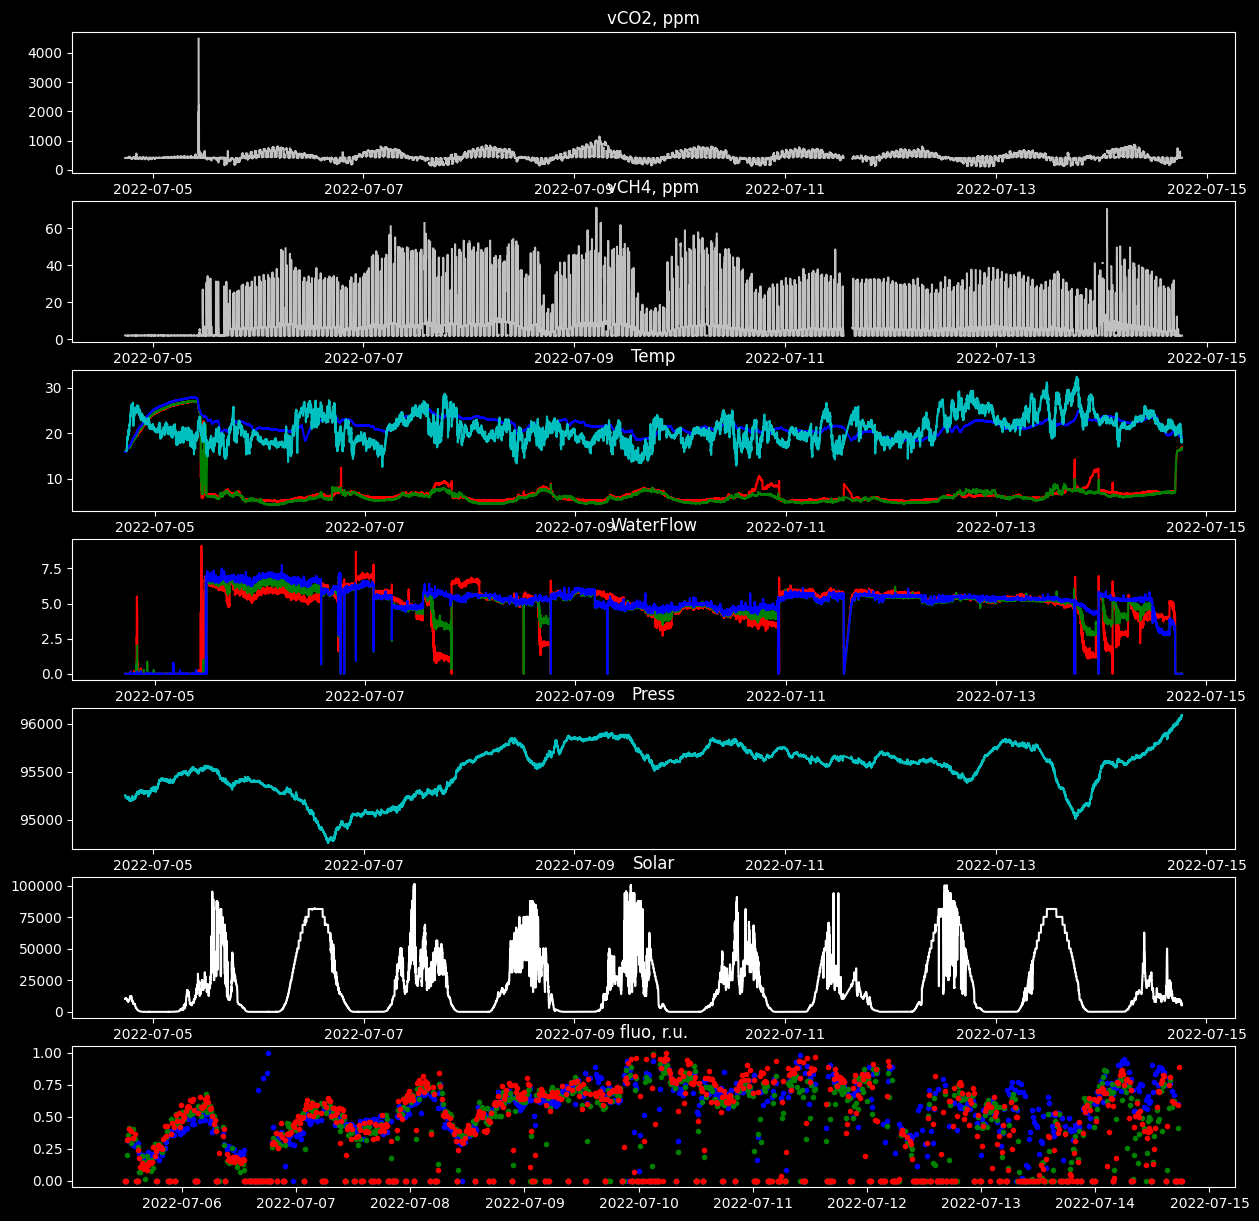

In [14]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, axs = plt.subplots(7, 1)

axs[0].set_title('vCO2, ppm')
axs[0].plot(df.DateTime, df['vCO2'], '-', c='silver')

axs[1].set_title('vCH4, ppm')
axs[1].plot(df.DateTime, df['vCH4'], '-', c='silver')

axs[2].set_title('Temp')
axs[2].plot(df.DateTime, df['TempEqu1'], 'r-')
axs[2].plot(df.DateTime, df['TempEqu2'], 'g-')
axs[2].plot(df.DateTime, df['TempEqu3'], 'b-')
axs[2].plot(df.DateTime, df['TempAir'], 'c-')

axs[3].set_title('WaterFlow')
axs[3].plot(df.DateTime, df['WaterFlowEqu1'], 'r-')
axs[3].plot(df.DateTime, df['WaterFlowEqu2'], 'g-')
axs[3].plot(df.DateTime, df['WaterFlowEqu3'], 'b-')

axs[4].set_title('Press')
axs[4].plot(df.DateTime, df['PressAir'], 'c-')
axs[5].set_title('Solar')
axs[5].plot(df.DateTime, df['LightLX'], 'w-')
axs[6].set_title('fluo, r.u.')
axs[6].plot(df.DateTime, df['FluoKfaBlu'], 'b.')
axs[6].plot(df.DateTime, df['FluoKfaGrn'], 'g.')
axs[6].plot(df.DateTime, df['FluoKfaRed'], 'r.')



### Correction data

In [15]:
## gether/apply specific variables
### data corrections
# df['vCO2'] = df['vCO2'] * scheme.CO2PicarroScaut_cor[0] + scheme.CO2PicarroScaut_cor[1]
# df['vCH4'] = df['vCH4'] * scheme.CH4PicarroScaut_cor[0] + scheme.CH4PicarroScaut_cor[1]
# df['vCO2'] = df['CO2_dry']
# df['vCH4'] = df['CH4_dry']
df['LightLX'] = df['LightLX'] * scheme.solar_cor[0] + scheme.solar_cor[1]
df['LightUV'] = df['LightUV'] * scheme.solar_uv_cor[0] + scheme.solar_uv_cor[1]
df['PressAir'] = bfunc.pressConvert(df['PressAir'])
df['PressAir'] = df['PressAir'] * scheme.press_cor[0] + scheme.press_cor[1]

### servise data corrections
df['TempEqu1'] = df['TempEqu1'] * scheme.tempEqu1_cor[0] + scheme.tempEqu1_cor[1]
df['TempEqu2'] = df['TempEqu2'] * scheme.tempEqu2_cor[0] + scheme.tempEqu2_cor[1]
df['TempEqu3'] = df['TempEqu3'] * scheme.tempEqu3_cor[0] + scheme.tempEqu3_cor[1]

df['AirFlow'] = df['AirFlow'] * scheme.airflow_cor[0] + scheme.airflow_cor[1]
df['WaterFlowEqu1'] = df['WaterFlowEqu1'] * scheme.waterflowEqu1_cor[0] + scheme.waterflowEqu1_cor[1]
df['WaterFlowEqu2'] = df['WaterFlowEqu2'] * scheme.waterflowEqu2_cor[0] + scheme.waterflowEqu2_cor[1]
df['WaterFlowEqu3'] = df['WaterFlowEqu3'] * scheme.waterflowEqu3_cor[0] + scheme.waterflowEqu3_cor[1]

In [16]:
v_state_list = list(scheme.CHANNEL_COLS.values())

chnl = 'Channel'
if not chnl in df.columns:
    df[chnl] = 0
if 'V1_state' in df.columns:
    df.loc[df.V1_state == 1, chnl] = 1
    df.loc[df.V2_state == 1, chnl] = 2
    df.loc[df.V3_state == 1, chnl] = 3
    df.loc[df.V4_state == 1, chnl] = 4
    df.loc[df.V5_state == 1, chnl] = 5
    df.loc[df.V6_state == 1, chnl] = 6
df.drop(v_state_list, inplace=True, errors='ignore')

###  Remove bad data   
List of accidental cases to filter data (see notes)

In [17]:
filter_list = [{'date_start': '01.08.2023 00:00', 'date_stop': '01.08.2023 13:00', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro is not ready
               {'date_start': '01.08.2023 13:32', 'date_stop': '01.08.2023 13:35', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro data is zero
               {'date_start': '01.08.2023 17:00', 'date_stop': '01.08.2023 17:20', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro gas pipe fault
               {'date_start': '01.08.2023 17:19', 'date_stop': '01.08.2023 17:25', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # Picarro gas pipe fault
               {'date_start': '02.08.2023 10:54', 'date_stop': '02.08.2023 10:59', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # gas pipe fault, change of desiccant
               {'date_start': '04.08.2023 11:05', 'date_stop': '04.08.2023 11:10', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # gas pipe fault, change of desiccant
               {'date_start': '04.08.2023 12:26', 'date_stop': '04.08.2023 14:39', 'cols': ['WaterFlowEqu1'], 'fill_with': 0},       # water flow unstable
               {'date_start': '04.08.2023 14:30', 'date_stop': '04.08.2023 14:37', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # pump 'surface' disconnected
               {'date_start': '05.08.2023 02:30', 'date_stop': '05.08.2023 08:06', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '06.08.2023 16:55', 'date_stop': '06.08.2023 16:59', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '07.08.2023 13:23', 'date_stop': '07.08.2023 16:06', 'cols': ['vCO2', 'vCH4'], 'fill_with': np.NaN},   # channel selector unit disfunction
               {'date_start': '07.08.2023 13:42', 'date_stop': '07.08.2023 16:56', 'cols': ['WaterFlowEqu1', 'WaterFlowEqu2'], 'fill_with': 0},  # water flow unstable
               {'date_start': '07.08.2023 16:19', 'date_stop': '07.08.2023 16:44', 'cols': ['TempEqu2'], 'fill_with': np.NaN},       # temperature sensor pulled out
               {'date_start': '08.08.2023 06:56', 'date_stop': '08.08.2023 10:56', 'cols': ['WaterFlowEqu1'], 'fill_with': 0},       # water flow unstable
               {'date_start': '08.08.2023 02:30', 'date_stop': '08.08.2023 10:00', 'cols': ['TempEqu2'], 'fill_with': np.NaN},
               {'date_start': '08.08.2023 10:43', 'date_stop': '08.08.2023 10:51', 'cols': ['TempEqu1'], 'fill_with': np.NaN},       # water flow unstable
               {'date_start': '08.08.2023 11:22', 'date_stop': '08.08.2023 11:30', 'cols': ['WaterFlowEqu2'], 'fill_with': 0},       # water flow unstable
               {'date_start': '08.08.2023 11:22', 'date_stop': '08.08.2023 11:30', 'cols': ['TempEqu2'], 'fill_with': np.NaN},
               {'date_start': '08.08.2023 14:51', 'date_stop': '08.08.2023 14:59', 'cols': ['TempEqu1'], 'fill_with': np.NaN},
              ]

for cycle in filter_list:
    for col in cycle['cols']:
        date_start = pd.to_datetime(cycle['date_start'], dayfirst=True)
        date_stop = pd.to_datetime(cycle['date_stop'], dayfirst=True)
        df.loc[(df['DateTime'] > date_start) & (df['DateTime'] < date_stop), col] = cycle['fill_with']

In [18]:
cols = ['FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu']
for col in cols:
    df.loc[df[col] == 0, col] = np.NaN
cols = ['WaterFlowEqu1', 'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4', 'AirFlow']
for col in cols:
    df.loc[df[col] < 0, col] = np.NaN

## Flux calc

In [19]:
### find the moments where flux is valid to calculate

t = pd.to_datetime('04.07.2022 19:00', dayfirst=True)  # start measure fluxes
df['flag'] = (df['Channel'] == 5) 
for deep in range(100):
    df['flag'] &= (df['Channel'] == df['Channel'].shift(deep))

tempflag = (df['Channel'] == 5) & (df['DateTime'] > t) 

for deep in range(2):
    tempflag &= (df['Channel'] == df['Channel'].shift(deep))

df['flag'] |= tempflag
# set flag for 100 points skipping first 2 points  
df['flag'] = df['flag'].astype('int8')
# count flux cycles for grouping
df['fluxEvent'] = (df['flag']==0) & (df['flag'].shift(-1)!=0)
df['fluxCount'] = df['fluxEvent'].cumsum() * df['flag']
#df['flag'] |= (df['Channel'] == 5) & (df['DateTime'] > t)

In [21]:
ch_v = 'flag'
df['cCO2chm'] = df['vCO2'][(df[chnl] == 5) & (df[ch_v] == 1)] * df['PressAir'] * bfunc.getDensity(temp=0, press=1, gas='CO2') / 1000
df['cCH4chm'] = df['vCH4'][(df[chnl] == 5) & (df[ch_v] == 1)] * df['PressAir'] * bfunc.getDensity(temp=0, press=1, gas='CH4') 
df['DateSec'] = df['DateTime'].astype('int64')//10**9
for col in ['cCO2chm', 'cCH4chm']:
    df[col] = df[col].rolling(5).mean()

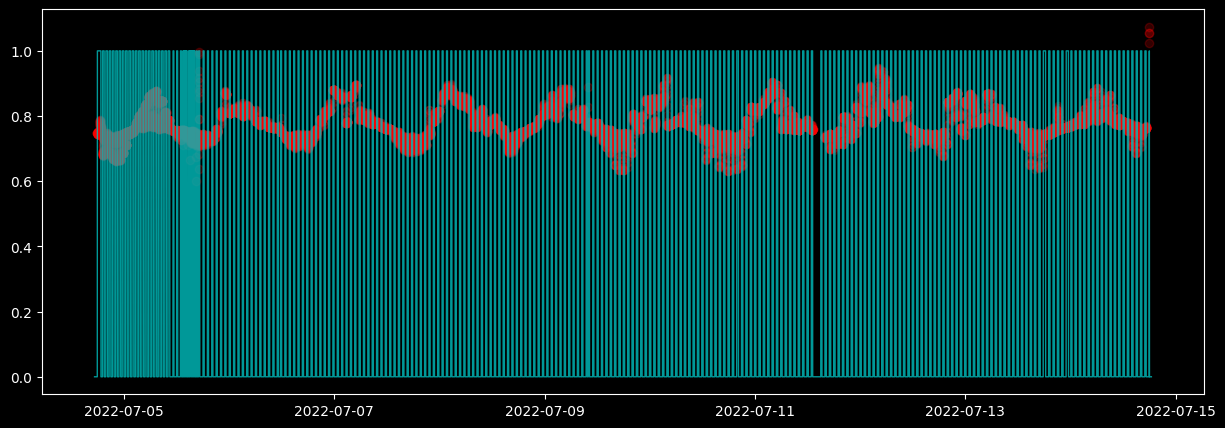

In [22]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1)
ax.plot('DateTime', 'cCO2chm', 'ro', linewidth=1, alpha=0.2, data=df )
ax.plot('DateTime', 'flag', 'c-', linewidth=1, alpha=0.8, data=df)
# ax.set_xlim(pd.to_datetime('07.07.2022 0:00', dayfirst=True), pd.to_datetime('15.07.2022 0:00', dayfirst=True))

In [23]:
deep = 1
df['CO2flux'] = (df['cCO2chm'].shift(-deep) - df['cCO2chm'].shift(deep)) / (df['DateSec'].shift(-deep) - df['DateSec'].shift(deep)) * 3600 / 0.81 * 320
df['CH4flux'] = (df['cCH4chm'].shift(-deep) - df['cCH4chm'].shift(deep)) / (df['DateSec'].shift(-deep) - df['DateSec'].shift(deep)) * 3600 / 0.81 * 320

(-200.0, 200.0)

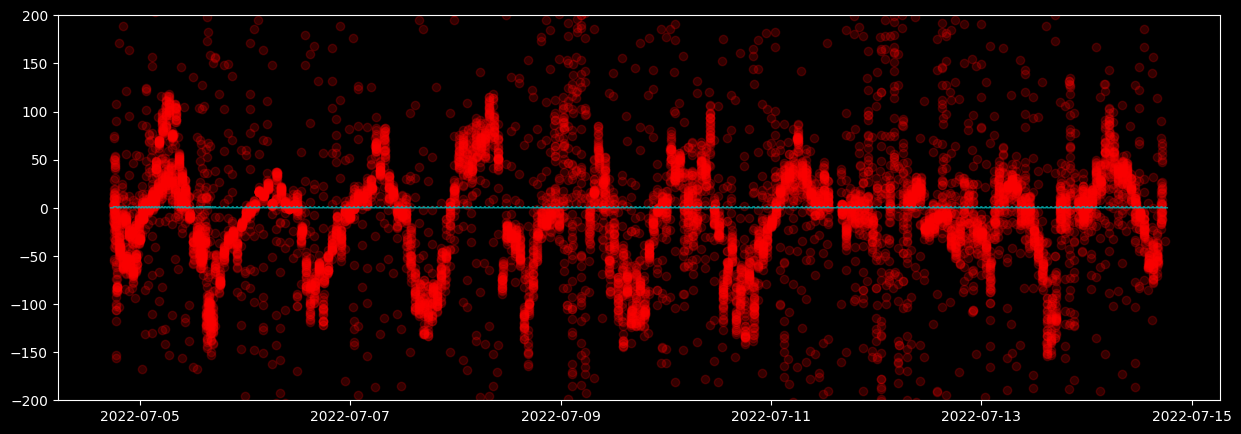

In [27]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1)
ax.plot('DateTime', 'CO2flux', 'ro', linewidth=1, alpha=0.2, data=df )
ax.plot('DateTime', 'flag', 'c-', linewidth=1, alpha=0.8, data=df)
# ax.set_xlim(pd.to_datetime('01.08.2023 14:00', dayfirst=True), pd.to_datetime('09.08.2023 18:00', dayfirst=True))
ax.set_ylim(-200, 200)

In [30]:
filter_list = [{'date_start': '07.08.2023 17:00', 'date_stop': '07.08.2023 17:10', 'cols': ['CO2flux', 'CH4flux'], 'fill_with': np.NaN},   # Wrench is blocked
               {'date_start': '08.08.2023 01:30', 'date_stop': '08.08.2023 11:20', 'cols': ['CO2flux', 'CH4flux'], 'fill_with': np.NaN},   # Wrench is blocked
              ]

for cycle in filter_list:
    date_start = pd.to_datetime(cycle['date_start'], dayfirst=True)
    date_stop = pd.to_datetime(cycle['date_stop'], dayfirst=True)
    for col in cycle['cols']:
        df.loc[(df['DateTime'] > date_start) & (df['DateTime'] < date_stop), col] = cycle['fill_with']

In [31]:
df['reff'] = 1
df = df.resample('20S', on='DateTime').mean()
df[chnl].fillna(method='ffill', inplace=True)
ch_v = 'Chn_valid'
df[ch_v] = 1
for deep in range(1, 7):
    df.loc[df[chnl] != df[chnl].shift(deep), ch_v] = 0
df.dropna(axis='index', subset=['reff'], inplace=True)

In [32]:
df['DateTime'] = df.index
df

,vCO2,vCH4,TempAir,PressAir,Precipitation,LightLX,LightUV,vH2O,AirFlow,flag,FluoNxRed,FluoNxGrn,FluoNxBlu,FluoKfaRed,FluoKfaGrn,FluoKfaBlu,Comments,WaterFlowEqu1,WaterFlowEqu2,WaterFlowEqu3,WaterFlowEqu4,TempEqu1,TempEqu2,TempEqu3,TempEqu4,temperature_ds_5,temperature_ds_6,temperature_ds_7,solar_altitude,solar_azimuth,Channel,fluxEvent,fluxCount,cCO2chm,cCH4chm,DateSec,CO2flux,CH4flux,reff,Chn_valid,DateTime
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-04 17:18:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.591,15.947,15.879,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,NaN,NaN,1.656955e+09,NaN,NaN,1.0,0,2022-07-04 17:18:20
2022-07-04 17:18:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.584,15.947,15.885,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,NaN,NaN,1.656955e+09,NaN,NaN,1.0,0,2022-07-04 17:18:40
2022-07-04 17:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.591,15.941,15.865,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,NaN,NaN,1.656955e+09,NaN,NaN,1.0,0,2022-07-04 17:19:00
2022-07-04 17:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.584,15.941,15.885,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,NaN,NaN,1.656955e+09,NaN,NaN,1.0,0,2022-07-04 17:19:20
2022-07-04 17:19:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,16.605,15.962,15.904,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,NaN,NaN,1.656955e+09,NaN,NaN,1.0,0,2022-07-04 17:19:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-14 18:24:00,NaN,NaN,18.42,0.948277,3.11,67.163000,0.004605,NaN,0.32198,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,17.402,16.502,19.244,NaN,NaN,NaN,NaN,22.92975,275.80191,6.0,0.0,0.0,NaN,NaN,1.657823e+09,NaN,NaN,1.0,1,2022-07-14 18:24:00
2022-07-14 18:24:20,NaN,NaN,18.44,0.948273,3.14,67.163000,0.004610,NaN,0.32198,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,17.420,16.526,19.244,NaN,NaN,NaN,NaN,22.87839,275.86547,6.0,0.0,0.0,NaN,NaN,1.657823e+09,NaN,NaN,1.0,1,2022-07-14 18:24:20
2022-07-14 18:24:40,NaN,NaN,18.59,0.948312,3.17,67.163000,0.004605,NaN,0.32198,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,17.432,16.514,19.232,NaN,NaN,NaN,NaN,22.82700,275.92905,6.0,0.0,0.0,NaN,NaN,1.657823e+09,NaN,NaN,1.0,1,2022-07-14 18:24:40


In [33]:
df['vCO2air'] = df['vCO2'][(df[chnl] == 6) & (df[ch_v] == 1)]
df['vCH4air'] = df['vCH4'][(df[chnl] == 6) & (df[ch_v] == 1)]
for col in ['vCO2air', 'vCH4air',]:
    df[col] = df[col].rolling(3).mean()

df['vCO2air'].interpolate(method='values', inplace=True)
df['vCH4air'].interpolate(method='values', inplace=True)  ## `time` method mb better
df['pCO2air'] = df['vCO2air'] * df['PressAir']  # mkatm
df['pCH4air'] = df['vCH4air'] * df['PressAir']  # mkatm

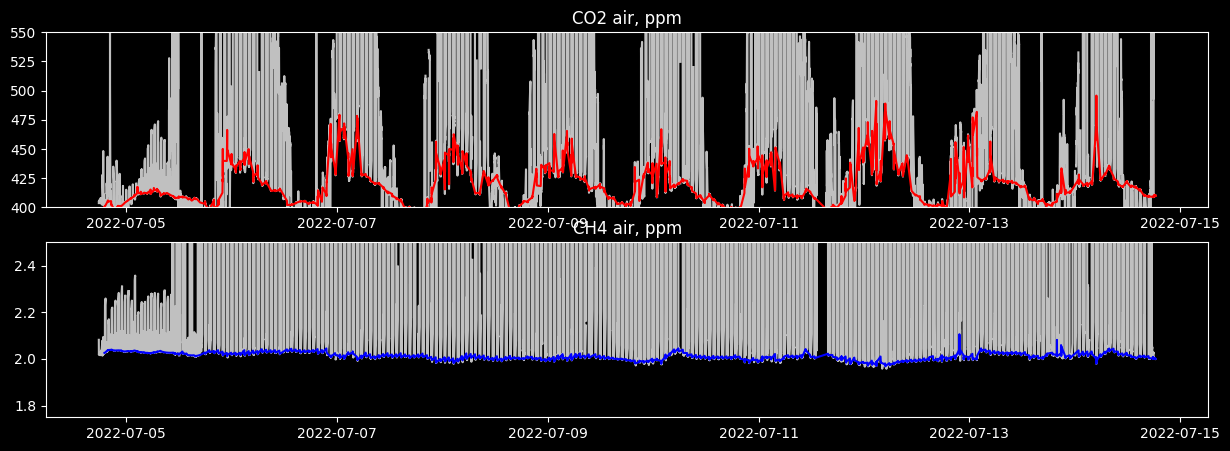

In [34]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, axs = plt.subplots(2, 1)

axs[0].set_title('CO2 air, ppm')
axs[0].set_ylim(400, 550)
axs[0].plot(df.DateTime, df['vCO2'], '-', c='silver')
axs[0].plot(df.DateTime, df['vCO2air'], 'r-')

axs[1].set_title('CH4 air, ppm')
axs[1].set_ylim(1.75, 2.5)
axs[1].plot(df.DateTime, df['vCH4'], '-', c='silver')
axs[1].plot(df.DateTime, df['vCH4air'], 'b-')
fig.savefig(saveImgPath+'cAir_vs_time.png', transparent=False)

In [35]:
df.columns

Index(['vCO2', 'vCH4', 'TempAir', 'PressAir', 'Precipitation', 'LightLX',
       'LightUV', 'vH2O', 'AirFlow', 'flag', 'FluoNxRed', 'FluoNxGrn',
       'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'Comments',
       'WaterFlowEqu1', 'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4',
       'TempEqu1', 'TempEqu2', 'TempEqu3', 'TempEqu4', 'temperature_ds_5',
       'temperature_ds_6', 'temperature_ds_7', 'solar_altitude',
       'solar_azimuth', 'Channel', 'fluxEvent', 'fluxCount', 'cCO2chm',
       'cCH4chm', 'DateSec', 'CO2flux', 'CH4flux', 'reff', 'Chn_valid',
       'DateTime', 'vCO2air', 'vCH4air', 'pCO2air', 'pCH4air'],
      dtype='object')

## RECOVERY !!!

In [39]:
df['DateSec'] = df['DateTime'].astype('int64')//10**9
df['dTSec'] = df['DateSec'] - df['DateSec'].shift(1)
dt = df['dTSec'] / 60   ## delta time, min
ch_v = 'Chn_valid'

#### recovery `CO2/CH4`, channel `1` (bottom jul 2022)

In [37]:
equ_vol = scheme.equ_walltube_param['equ_vol']  # equivalent equ volume, l
equ_cap = scheme.equ_walltube_param['equ_cap']  # equilibrator capacity
wtr_flow_min = scheme.equ_walltube_param['water_flow_min'] 

In [38]:
t_wtr = df['TempEqu1']
t_air = t_wtr
wtr_flow = df['WaterFlowEqu1']
air_flow = df['AirFlow']

In [40]:
### CO2 water
df['vCO2equ'] = df['vCO2'][(df[chnl] == 1) & (df[ch_v] == 1) & (wtr_flow > wtr_flow_min)]
solubility = bfunc.getSolubility(t_wtr, 'CO2')

density = bfunc.getDensity(t_air, df['PressAir'], 'CO2')
cGasAir = df['pCO2air'] / 1000000 * density
pGasEquAir = df['vCO2equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)

df['cCO2bot'] = cGasWtr * 1000     # mg/l
df['pCO2bot'] = cGasWtr * 1000000 / solubility  # mkatm

In [41]:
### CH4 water
df['vCH4equ'] = df['vCH4'][(df[chnl] == 1) & (df[ch_v] == 1)]
solubility = bfunc.getSolubility(t_wtr, 'CH4')

density = bfunc.getDensity(t_air, df['PressAir'], 'CH4')
cGasAir = df['pCH4air'] / 1000000 * density
pGasEquAir = df['vCH4equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)
df['cCH4bot'] = cGasWtr * 1000000000    # ng/l
df['pCH4bot'] = cGasWtr * 1000000 / solubility  # mkatm

#### recovery `CO2/CH4`, channel `2` (surface in jul 2022)

In [42]:
t_wtr = df['TempEqu2']
t_air = t_wtr
wtr_flow = df['WaterFlowEqu2']

In [43]:
### CO2 water
df['vCO2equ'] = df['vCO2'][(df[chnl] == 2) & (df[ch_v] == 1) & (wtr_flow > wtr_flow_min)]
solubility = bfunc.getSolubility(t_wtr, 'CO2')

density = bfunc.getDensity(t_air, df['PressAir'], 'CO2')
cGasAir = df['pCO2air'] / 1000000 * density
pGasEquAir = df['vCO2equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)

df['cCO2sur'] = cGasWtr * 1000     # mg/l
df['pCO2sur'] = cGasWtr * 1000000 / solubility  # mkatm

In [44]:
### CH4 water
df['vCH4equ'] = df['vCH4'][(df[chnl] == 2) & (df[ch_v] == 1)]
solubility = bfunc.getSolubility(df['TempEqu1'], 'CH4')

density = bfunc.getDensity(t_air, df['PressAir'], 'CH4')
cGasAir = df['pCH4air'] / 1000000 * density
pGasEquAir = df['vCH4equ'] * df['PressAir']
cGasEquAir = pGasEquAir * density / 1000000  # g/l

tau = equ_vol/(air_flow+wtr_flow*equ_cap*solubility/density)
eternal = (cGasEquAir-cGasEquAir.shift(1)*np.exp(-1*dt/tau))/(1-np.exp(-1*dt/tau))
cGasWtr = (eternal*(wtr_flow*equ_cap*solubility/density+air_flow)-air_flow*cGasAir)/(wtr_flow*equ_cap)
df['cCH4sur'] = cGasWtr * 1000000000    # ng/l
df['pCH4sur'] = cGasWtr * 1000000 / solubility  # mkatm

In [45]:
## rolling average is applied inplace. Be cafelly, run this cell **ONCE**

for col in ['cCO2sur', 'cCO2bot', 'pCO2sur', 'pCO2bot', 'cCH4sur', 'pCH4sur', 'cCH4bot', 'pCH4bot']:
    df.loc[df[col] == np.inf , col] = np.nan 
    df.loc[df[col] == -np.inf , col] = np.nan
    df.loc[df[col] <= 0 , col] = np.nan
    df[col] = df[col].rolling(4, center=True).mean()

df['cCH4bot'].describe()

count    7783.000000
mean      646.456915
std       215.386129
min       125.085848
25%       494.722064
50%       583.491862
75%       786.003267
max      1528.079078
Name: cCH4bot, dtype: float64

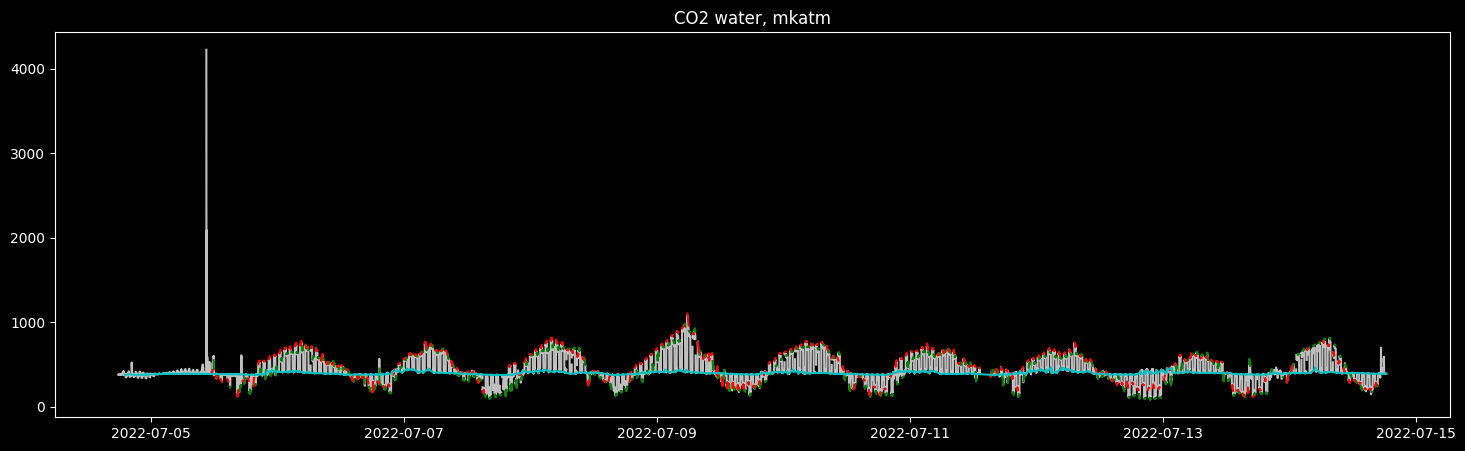

In [46]:
df['pCO2'] = df['vCO2'] * df['PressAir']

plt.rcParams['figure.figsize'] = [18, 5]
fig, ax = plt.subplots()
## ax.set_xlim(pd.to_datetime('05.06.2023 18:00:00', dayfirst=True), pd.to_datetime('05.06.2023 19:00:00', dayfirst=True))
ax.set_title('CO2 water, mkatm')
# ax.set_ylim(0, 800)
ax.plot(df.DateTime, df['pCO2'], '-', c='silver')
ax.plot(df.DateTime, df['pCO2sur'], 'g-')
ax.plot(df.DateTime, df['pCO2bot'], 'r-')
ax.plot(df.DateTime, df['pCO2air'], 'c-')
fig.savefig(saveImgPath+'pCO2wtr_vs_time.png')

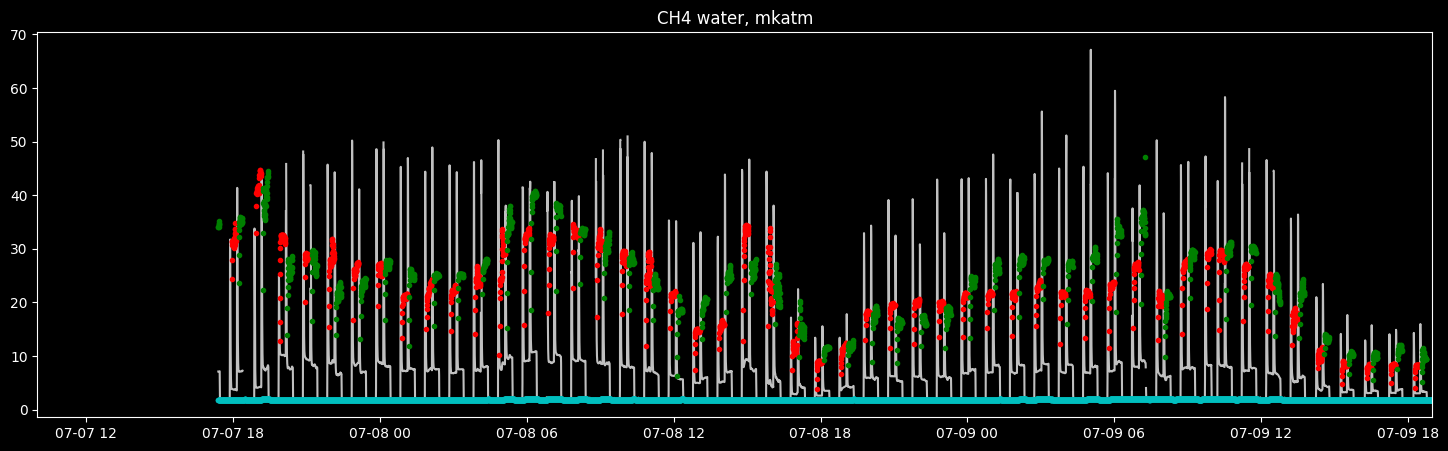

In [47]:
count_recent = 30000
df['pCH4'] = df['vCH4'] * df['PressAir']
plt.rcParams['figure.figsize'] = [18, 5]
fig, ax = plt.subplots()
ax.set_title('CH4 water, mkatm')
ax.set_xlim(pd.to_datetime('07.07.2022 10:00:00', dayfirst=True), pd.to_datetime('09.07.2022 19:00:00', dayfirst=True))
# ax.set_ylim(0, 20)
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4'], '-', c='silver')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4air'], 'c.')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4bot'], 'r.')
ax.plot(df.tail(count_recent).DateTime, df.tail(count_recent)['pCH4sur'], 'g.')
fig.savefig(saveImgPath+'pCH4wtr_vs_time.png')

In [48]:
df.columns

Index(['vCO2', 'vCH4', 'TempAir', 'PressAir', 'Precipitation', 'LightLX',
       'LightUV', 'vH2O', 'AirFlow', 'flag', 'FluoNxRed', 'FluoNxGrn',
       'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'Comments',
       'WaterFlowEqu1', 'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4',
       'TempEqu1', 'TempEqu2', 'TempEqu3', 'TempEqu4', 'temperature_ds_5',
       'temperature_ds_6', 'temperature_ds_7', 'solar_altitude',
       'solar_azimuth', 'Channel', 'fluxEvent', 'fluxCount', 'cCO2chm',
       'cCH4chm', 'DateSec', 'CO2flux', 'CH4flux', 'reff', 'Chn_valid',
       'DateTime', 'vCO2air', 'vCH4air', 'pCO2air', 'pCH4air', 'dTSec',
       'vCO2equ', 'cCO2bot', 'pCO2bot', 'vCH4equ', 'cCH4bot', 'pCH4bot',
       'cCO2sur', 'pCO2sur', 'cCH4sur', 'pCH4sur', 'pCO2', 'pCH4'],
      dtype='object')

In [49]:
df['hour'] = df['DateTime'].dt.hour + df['DateTime'].dt.minute / 60
df['hour']

DateTime
2022-07-04 17:18:20    17.300000
2022-07-04 17:18:40    17.300000
2022-07-04 17:19:00    17.316667
2022-07-04 17:19:20    17.316667
2022-07-04 17:19:40    17.316667
                         ...    
2022-07-14 18:24:00    18.400000
2022-07-14 18:24:20    18.400000
2022-07-14 18:24:40    18.400000
2022-07-14 18:25:00    18.416667
2022-07-14 18:25:20    18.416667
Name: hour, Length: 42915, dtype: float64

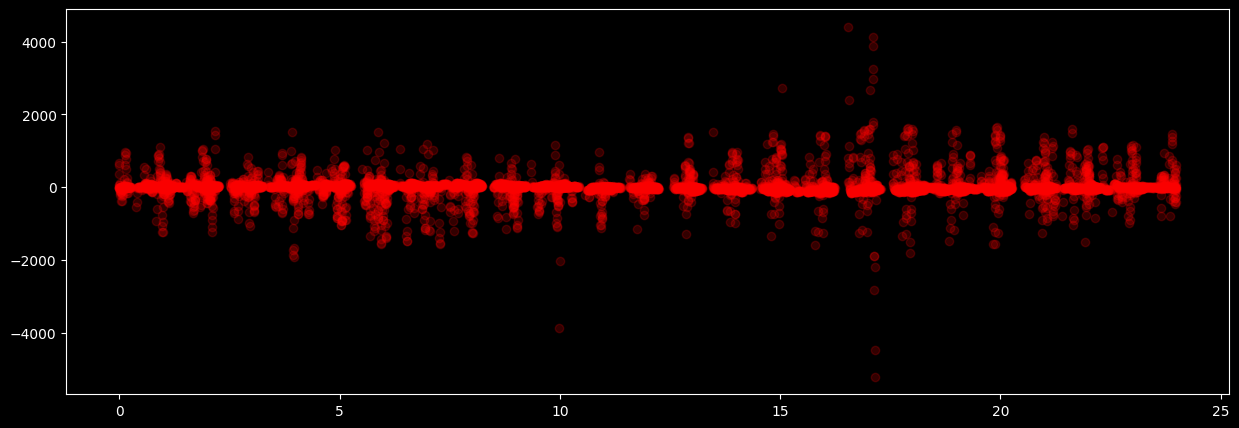

In [50]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1)
ax.plot('hour', 'CO2flux', 'ro', linewidth=1, alpha=0.2, data=df )
# ax.set_ylim(-100, 10)

In [51]:
cols = ['hour', 'DateSec', 'TempAir', 'PressAir', 'Precipitation', 'LightLX', 'LightUV',
        'vCO2', 'vCH4', 'vH2O', 'AirFlow', 'Channel',
        'FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'WaterFlowEqu1',
        'WaterFlowEqu2', 'WaterFlowEqu3', 'WaterFlowEqu4',
        'TempEqu1', 'TempEqu2', 'TempEqu3', 'cCO2chm', 'cCH4chm',
        'CO2flux', 'CH4flux', 'vCO2air', 'vCH4air',
        'pCO2air', 'pCH4air', 'cCO2sur', 'pCO2sur',
        'cCH4sur', 'pCH4sur', 'cCO2bot', 'pCO2bot', 'cCH4bot', 'pCH4bot',]
df.to_csv(f'{pwd}origin_pd.txt',
          columns=cols,
          sep='\t',
         )

In [52]:
hourly = df.resample('1H', on='DateTime').mean()

cols = ['hour', 'DateSec', 'TempAir', 'PressAir', 'Precipitation', 'LightLX', 'LightUV',
        'vCO2', 'vCH4', 'vH2O',
        'FluoNxRed', 'FluoNxGrn', 'FluoNxBlu', 'FluoKfaRed', 'FluoKfaGrn', 'FluoKfaBlu', 'WaterFlowEqu1',
        'TempEqu1', 'TempEqu2', 'TempEqu3', 'cCO2chm', 'cCH4chm',
        'CO2flux', 'CH4flux', 'vCO2air', 'vCH4air',
        'pCO2air', 'pCH4air', 'cCO2sur', 'pCO2sur',
        'cCH4sur', 'pCH4sur', 'cCO2bot', 'pCO2bot', 'cCH4bot', 'pCH4bot',]
hourly.to_csv(f'{saveDataPath}hourly.txt',
              columns=cols,
              sep='\t',
             )

In [ ]:
sol_ch4 = bfunc.getSolubility(df['TempEqu1'], 'ch4')
sol_ch4

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['TempEqu1'], sol_ch4, 'ro')

In [ ]:
temp = [t for t in range(0, 50)]
dft = pd.DataFrame(temp, columns=['temperature'])
dft['sol'] = bfunc.getSolubility(dft['temperature'], 'ch4')

fig, ax = plt.subplots(1)

ax.plot(dft['temperature'], dft['sol'])